## 1. EDA

데이터 불러오기 > 데이터 정보 관측하기 > 데이터 크기 파악하기 > 데이터 feature 알아보기


```
#데이터 불러오기
df = pd.read_csv('경로')

#데이터 정보 관측하기 ; feature 수, column 명, 결측치 여부, Dtype
df.info()

#데이터 크기 파악하기 ; 행 갯수, 열 갯수 
df.shape

#데이터 featur 알아보기 ; df 각 column 정보
df.head()
```

```
#결측치 유무 확인
df.isnull().sum()
```

#### | 수치데이터 특성보기
DataFrame에 describe()를 실행하면,   
결측치를 제외하고 수치형 데이터에 한해 각 열에 대해 요약이 수행된다.   
기본적으로 count,mean, std, min, 1분위수. 2분위수, 3분위수, max 값이 출력된다.

```
df.describe()
```

In [1]:
import pandas as pd
train = pd.read_csv('data/wine/train.csv')

train.describe()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,2748.000000,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,1586.991546,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,0.000000,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,1374.000000,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,2748.000000,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,4122.000000,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,5496.000000,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


#### | 변수분포 시각화

**matplotlib, seaborn 라이브러리** 로 시각화 출력 가능   
시각화 결과를 통해 머신러닝 방향성을 잡을 수 있다.

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


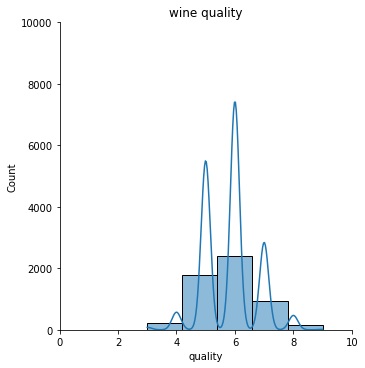

In [2]:
#시각화에 필요한 라이브러리 import
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#wjupyter notebook 내네서 결과를 출력하도록 설정
%matplotlib inline

#글꼴 설정
plt.rc('font', family='NanumBarunGothic')

#마이너스 기호 출력
plt.rc('axes', unicode_minus=False)

#분석에 문제가 없는 경고 메세지는 숨김
import warnings
warnings.filterwarnings('ignore')

######################################################################

#시각화 진행시, 보통 복사본을 생성한 후 진행한다.
train_cp = train.copy()


#1 seaborn 의 displot() 으로 어느 변수를 시각화할지 옵션에 지정해주세요.
sns.displot(train_cp['quality'], kde=True, bins=5)
#2 matplot 의 axis() 로 각 축의 최소, 최대 값을 지정해주세요.
plt.axis([0, 10, 0, 10000])
#3 matplot 의 title() 로 그래프의 제목을 지정해주세요.
plt.title('wine quality')
#4 matplot 의 show() 로 그래프를 출력해주세요.
plt.show()

> pyplot 으로 그래프 틀을 셋팅하고 seaborn으로 차트를 그려준다

#### | matplotlib 선그래프
plot()을 통해 선그래프를 그린다.

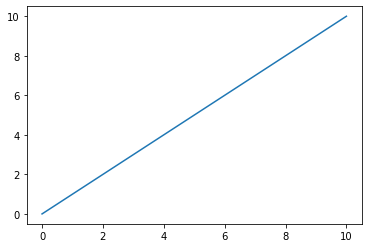

In [3]:
from matplotlib import pyplot as plt

#X축, Y축의 지점 값 리스트
x_values = [0,2,4,6,8,10]
y_vlaues = [0,2,4,6,8,10]

#line 그래프 그리기
plt.plot(x_values, y_vlaues)

#그래프 보이기
plt.show()

#### | matplotlib 히스토그램 그리기
histogram은 도수분포표를 그래프로 나타낸 것으로 변수들의 분포정도를 볼 때 유용하다.

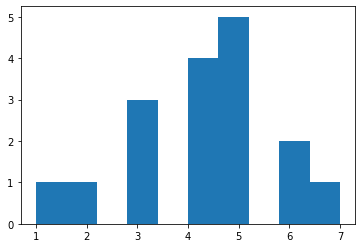

In [4]:
#변수 분포를 갖는 리스트 생성
a= [1,2,3,3,3,4,4,4,4,5,5,5,5,5,6,6,7]

#히스토그램 그리기
plt.hist(a)

#그래프 보여주기
plt.show()

---

## 2. Data Preporcessing

#### | 이상치(Outlier)탐지   
이상치는 일반적인 데이터 패턴과 매우 다른 패턴을 갖는 데이터   
이상치데이터는 모델의 성능을 크게 떨어트린다.   
   
이상치 탐지의 대표적인 방법으로는 IQR(Inter Qunatile Range), 사분위 값 편차를 이용한다.   
이를 boxplot 그래프로 볼 수 있다.   


<AxesSubplot:>

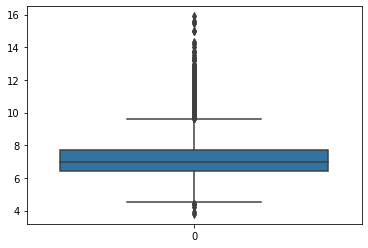

In [5]:
import seaborn as sns

#'fixed acidity' feature의 이상치 확인 
sns.boxplot(data=train['fixed acidity'])

#### | 이상치 제거
IQR을 통한 이상치 제거    
IQR은 3분위수(75%에 위치한 값) - 1분위수(25%에 위치한 값)을 의미한다.   
   
![boxplot](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile1.uf.tistory.com%2Fimage%2F99D3C43359C29437228FD1)
   
1. min : 1분위 - 1.5 IQR
2. 1분위 : 25% 위치
3. 2분위 : 50% 위치 (median)
4. 3분위 : 75% 위치
5. max : 3분위 + 1.5 IQR
* IQR : 3분위 - 1분위 

In [6]:
import numpy as np

#1분위 25% 값
quantile_25 = np.quantile(train['fixed acidity'], 0.25)

#3분위 75% 값
quantile_75 = np.quantile(train['fixed acidity'], 0.75)

#IQR
IQR = quantile_75 - quantile_25

#min
minimun = quantile_25 - 1.5*IQR

#max
maximun = quantile_75 + 1.5*IQR

#min보다 작고, max보다 큰값 뽑아내기
train2 = train[(minimun<=train['fixed acidity'])&(maximun>=train['fixed acidity'])]

In [7]:
#이상치 데이터 크기 파악
train2.shape

(5203, 14)

In [8]:
#이상치 갯수 파악
print(train.shape[0])
print(train2.shape[0])

print(train.shape[0] - train2.shape[0])

print(train.shape[0])
print(train2.shape[0])

5497
5203
294
5497
5203


#### | 수치형 데이터 정규화
트리기반 모델(의사결정나무, 랜덤포레스트 등)은 대소 비교를 통해 구분하므로 숫자 단위에 크게 영향을 받지 않는다.  
평활함수 모델(logistic regression,lass 등)은 숫자의 크기와 단위에 영향을 많이 받는다.   
   
다양한 수치형 데이터 정규화 방법 중, **"Min Max Scailing"** 기법은,   
최소값을 0, 최대값을 1로 주어 비율에 따라 0~1사이에 값들을 분포시키는 방법이다.   
   
but, Min Max Scailing은 **이상치에 민감**하다.   
이상치를 최소 혹은 최대로 잡는 경우 분포가 어그러질 수 있으므로, 꼭 이상치를 제거할 것.

In [9]:
#feature 별 분포 파악
train.describe()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,2748.000000,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,1586.991546,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,0.000000,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,1374.000000,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,2748.000000,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,4122.000000,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,5496.000000,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


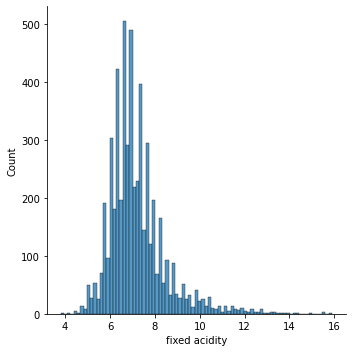

In [10]:
#displot 그리기
sns.displot(train['fixed acidity'])

In [11]:
from sklearn.preprocessing import MinMaxScaler

#MinMaxScaler 지정
scaler = MinMaxScaler()

In [12]:
#scaler 학습
scaler.fit(train[['fixed acidity']])

MinMaxScaler()

In [13]:
#분포 범위를 변경한 scaler, column에 저장
train['Scaled fixed acidity'] = scaler.transform(train[['fixed acidity']])

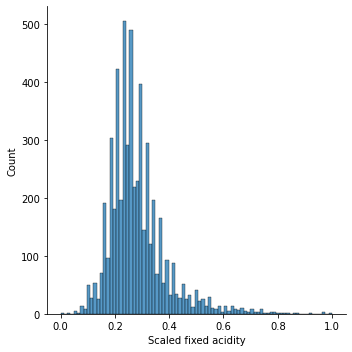

In [14]:
#Scaled fixed acidity의 displot그리기
sns.displot(train['Scaled fixed acidity'])

#### | 원 - 핫 인코딩 

컴퓨터는 문자로 된 데이터를 학습할 수 없다.   
이런 데이터들은 컴퓨터가 학습할 수 있도록 인코등을 한다.   
   
인코딩 방법 중 하나인 **"One-Hot Encoding"** 은 자신에게 맞는 것은 1로 나머지는 모두 0으로 변경한다.

In [15]:
from sklearn.preprocessing import OneHotEncoder

#모델, 변수에 저장
encoder = OneHotEncoder()

In [16]:
#text feature('type') 학습
encoder.fit(train[['type']])

OneHotEncoder()

In [17]:
#학습된 모델, 변수에 저장
onehot = encoder.transform(train[['type']])

In [18]:
#onehot, array로 변환
onehot = onehot.toarray()

#onehot, DataFrame으로 변환
onehot = pd.DataFrame(onehot)

In [19]:
# get_feature_names() > column이름 변경
onehot.columns = encoder.get_feature_names()

onehot.head()

,x0_red,x0_white
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [20]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,Scaled fixed acidity
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white,0.148760
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red,0.413223
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white,0.338843
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white,0.264463
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white,0.330579


In [21]:
#원본데이터에 onehot병합
train = pd.concat([train,onehot], axis=1)

In [22]:
print('---------concat---------')
train.head()

---------concat---------


,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,Scaled fixed acidity,x0_red,x0_white
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white,0.148760,0.0,1.0
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red,0.413223,1.0,0.0
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white,0.338843,0.0,1.0
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white,0.264463,0.0,1.0
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white,0.330579,0.0,1.0


In [23]:
#원본데이터에 text feature('type')제거
train = train.drop(columns=['type'])

In [24]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Scaled fixed acidity,x0_red,x0_white
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0.148760,0.0,1.0
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0.413223,1.0,0.0
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0.338843,0.0,1.0
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0.264463,0.0,1.0
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0.330579,0.0,1.0


## 3. Modeling

#### | RandomForestClassifier()
- 회귀 모형 : 집값, 주가, 시가등 특정한 값을 맞추는 모형
- 분류 모형 : 어떤 그룹에 속할지 예측하는 모형

In [25]:
#와인분류 > 분류모형 사용

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

X = train.drop(['quality'],axis=1)
Y = train['quality']

random_forest.fit(X,Y)

RandomForestClassifier()

#### | 교차검증
- Hold-out   
    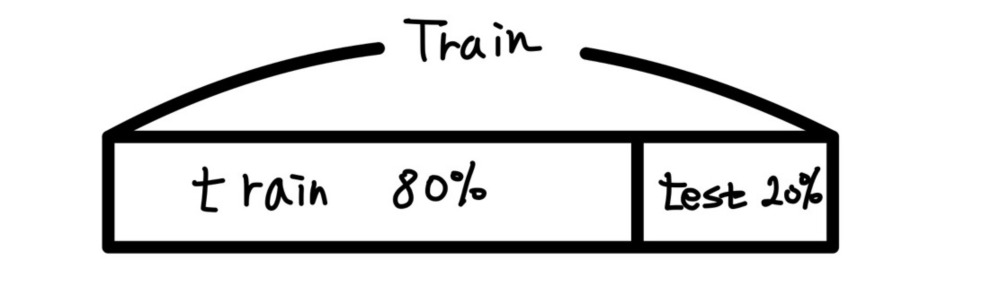   
    - 단순하게 train데이터를 (train, valid), 2개의 데이터로 나누는 작업
    - 보통 train:valid = 8:2 혹은 7:3 비율로 나눈다. > 데이터의 80%로 학습하고 20%를 예측값과 검증
    
    - 문제점
        -데이터 낭비
        -20%의 valid 데이터는 예측으로만 활용, 학습 기회를 갖지 못한다. -> 교차검증 고안

                 
- K-Fold   
    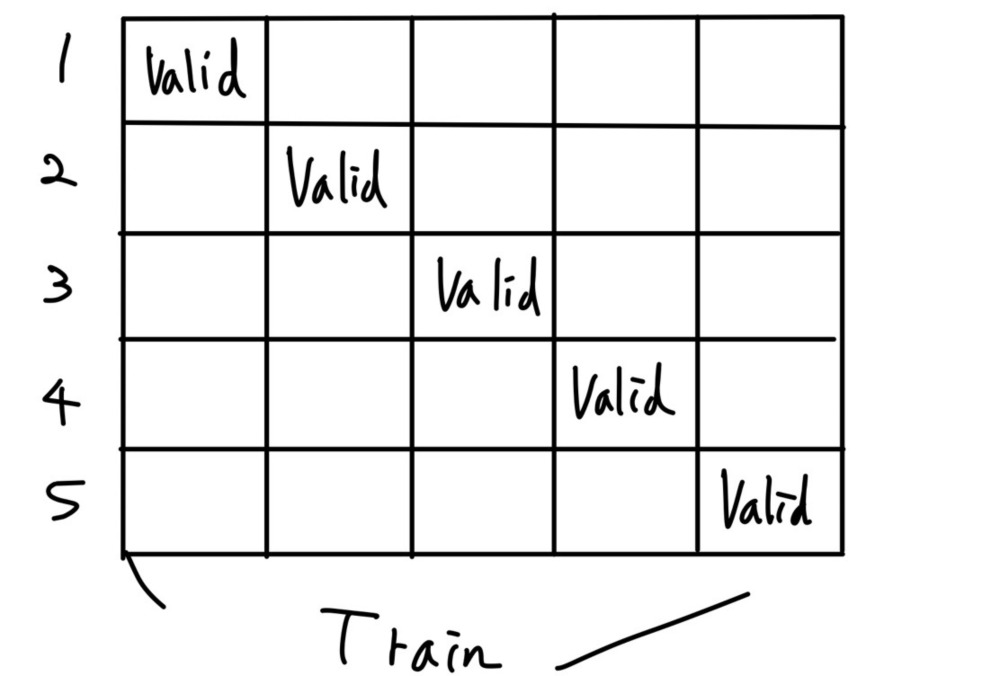   
    - 모든 데이터를 최소한 한 번씩 다 학습하게 한다.
    - valid 데이트를 겹치지 않게 N개의 데이터 셋을 만든다. 그림처럼 5개의 데이터 셋(20%의 valid 데이터)를 학습

In [26]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=0)

#반복문을 통해 데이터 접근
for train_idx, valid_idx in kf.split(train) :
    train_data = train.iloc[train_idx]
    valid_data = train.iloc[valid_idx]


> **loc와 iloc**
>   
> loc - Access a group of rows and columns by label(s) or a boolean array.   
> loc는 location의 약어로 DataFrame의 row또는 column의 label이나 boolean array로 인덱싱하는 방법   
> 즉, 사람이 읽을 수 있는 라벨 값으로 특정 값들을 골라오는 방법   
> loc[]에 인자로 index값을 지정해주면 라벨과 함께 하나의 행을 뽑아온다.   
> loc['index 번호','특정 feature명'] 으로 원하는 값만 뽑아올 수도 있다.
> loc[:,:]으로 슬라이싱 또한 가능하다   
>   
> iloc - Purely integer-location based indexing for selection by position.     
> iloc는 integer location의 약어로 DataFrame의 row또는 column의 순서를 나타내는 정수로 특정 값을 추출해 오는 방법   


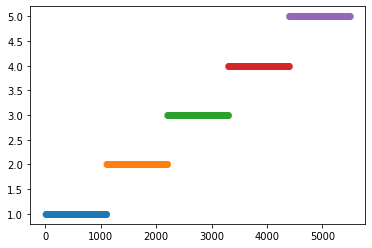

In [27]:
import matplotlib.pyplot as plt

kf = KFold(n_splits=5, shuffle=False)

i = 1
for train_idx, valid_idx in kf.split(train): #df구조라 x,y의 변수로 반복을 돌린다.
    plt.scatter(valid_idx, [i for x in range(len(valid_idx))], alpha=0.1) #alpha는 투명도
    i += 1
plt.show()

## 아래의 이미지는 shuffle = False로 했을 때, 데이터가 겹치지 않게 순서대로 쪼개지는 것을 볼 수 있습니다.

**K-Fold의 흐름**   
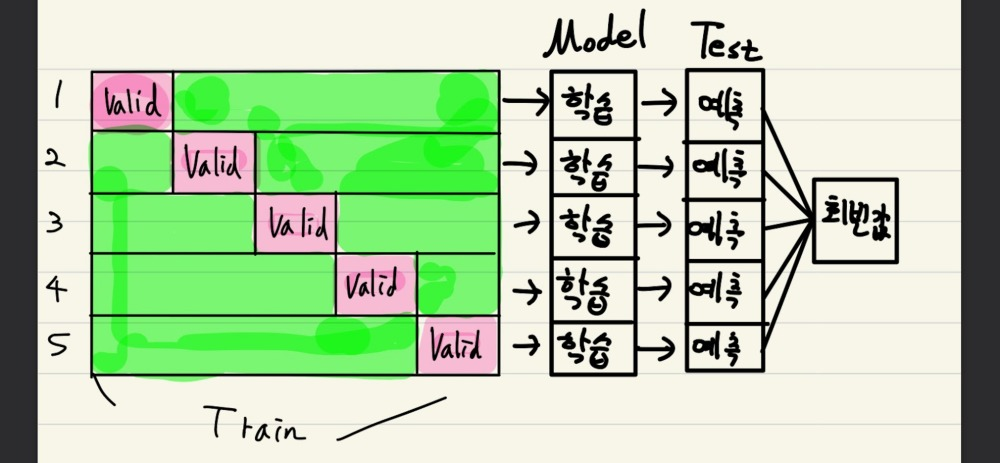   
1. K-Fold를 이용해, Train과 Valid Data를 나눈다.
2. Model을 통해 Train데이터를 학습한다.
3. Model을 통해 Valid데이터를 예측, 성능을 확인한다.
4. Model을 이용해 test데이터를 예측한다.
5. n_splits를 5로 설정했다고 가정, 5개의 결과 값들에 대한 **최빈값** 을 이용해 가장 등장가능성이 높은 결과값으로 결정한다.
6. 결과를 제출한다.

In [31]:
from sklearn.metrics import accuracy_score
import numpy as np

test = pd.read_csv('data/wine/test.csv')


#데이터 정리(중요도 낮은 변수 정리, train/결과값 분리)
X = train.drop(columns=['index','quality'])
y = train['quality']

#test scaling
test['Scaled fixed acidity'] = scaler.transform(test[['fixed acidity']])
#test onehot encoding
onehot = encoder.transform(test[['type']])
onehot = onehot.toarray()
onehot = pd.DataFrame(onehot)
onehot.columns = encoder.get_feature_names()
test = pd.concat([test, onehot], axis = 1)
test = test.drop(columns = ['type'])

#model 선언
kf= KFold(n_splits=5, shuffle=True, random_state=0)

model = RandomForestClassifier()
valid_scores =[]
test_predictions = []

#k-split 활용
# > 각 split마다의 train index와 valid index의 리스트를 저장해둔다.
# > split(학습할 df, 결과값)
for train_idx,valid_idx in kf.split(X,y):
    #######index값 정리
    X_tr = X.iloc[train_idx] 
    # x컬럼(훈련 df)을 갖는 train의 index들 series로 저장
    y_tr = y.iloc[train_idx]
    # y컬럼(결과값)을 갖는 train의 index's list
    
    X_val = X.iloc[valid_idx]    
    #valide의 index's list
    y_val = y.iloc[valid_idx]
    
    #######모델 훈련
    # 반복을 통한 각 split의 모델 훈련
    model.fit(X_tr,y_tr)
    
    #######결과 저장
    valid_prediction = model.predict(X_val)
    
    #######성능 예측
    # > valid의 결과 값(y column)과 훈련을 거쳐 valid의 값을 예측한 값을 비교 > 성능 평가
    # > 성능 예측값 temp list에 저장!
    score = accuracy_score(y_val,valid_prediction)
    valid_scores.append(score)
    
    #######split 성능 결과치
    # > 각 split별 성능 지표 결과
    print(score)
    
    #test data 검증
    test_pred = model.predict(test.drop(columns = ['index']))
    test_predictions.append(test_pred)

print('평균점수:',np.mean(valid_scores))
    
    
#test data, 형변환 
test_predictions = pd.DataFrame(test_predictions)
    
#df.mode 열별 최빈값 확인
test_pred = test_predictions.mode()
test_pred = test_predictions.values[0] #최빈값 저장
    
#제출 파일 생성
sample_submission = pd.read_csv('data/wine/sample_submission.csv')
sample_submission['quality'] = test_pred
sample_submission.to_csv('data/wine/submission_KFOLD.csv', index=False) 

0.7036363636363636
0.6754545454545454
0.6578707916287534
0.6787989080982711
0.6824385805277525
평균점수: 0.6796398378691373


> **df.mode()**  
> mode메서드를 사용하면 각 열에 대해서 최빈값이 인덱스 0에 출력된다.  
> 만약 최빈값이 여러개일 경우 갯수만큼 인덱스가 생성되어 출력됩니다.  
> 이 때, 최빈값 이외의 값은 NaN을 출력합니다.  
![mode](https://ifh.cc/g/LM1SVY.png)

---
## Tunning 

#### Bayesian Optimization

하이퍼 파라미터 튜닝
- Grid Search
- Random Search   
- **Bayesian Optimization**
    - "Gausaon Process"라는 통계학을 기반으로 만들어진 모델
    - 여러개의 하이퍼 파라미터들에 "Aqusition Function"적용시 **가장 큰 값** 이 나올 확률이 높은 지점을 찾는다.

    적용
    - 하이터 파라이터 범위 설정
    - 하이터 파라미터 범위 속, 랜덤 값 추출
    - R번, Random하게 좌표를 추출, 성능확인
    - B번, Bayesian Optimization을 통해 B번만큼 최적의 값 서치

* implementation
    * pip :  pip install bayesian-optimization   
    * conda : conda install -c conda-forge bayesian-optimization
       
* import 
```
from bayes_opt import BayesianOptimization
```

1. GridSearch   
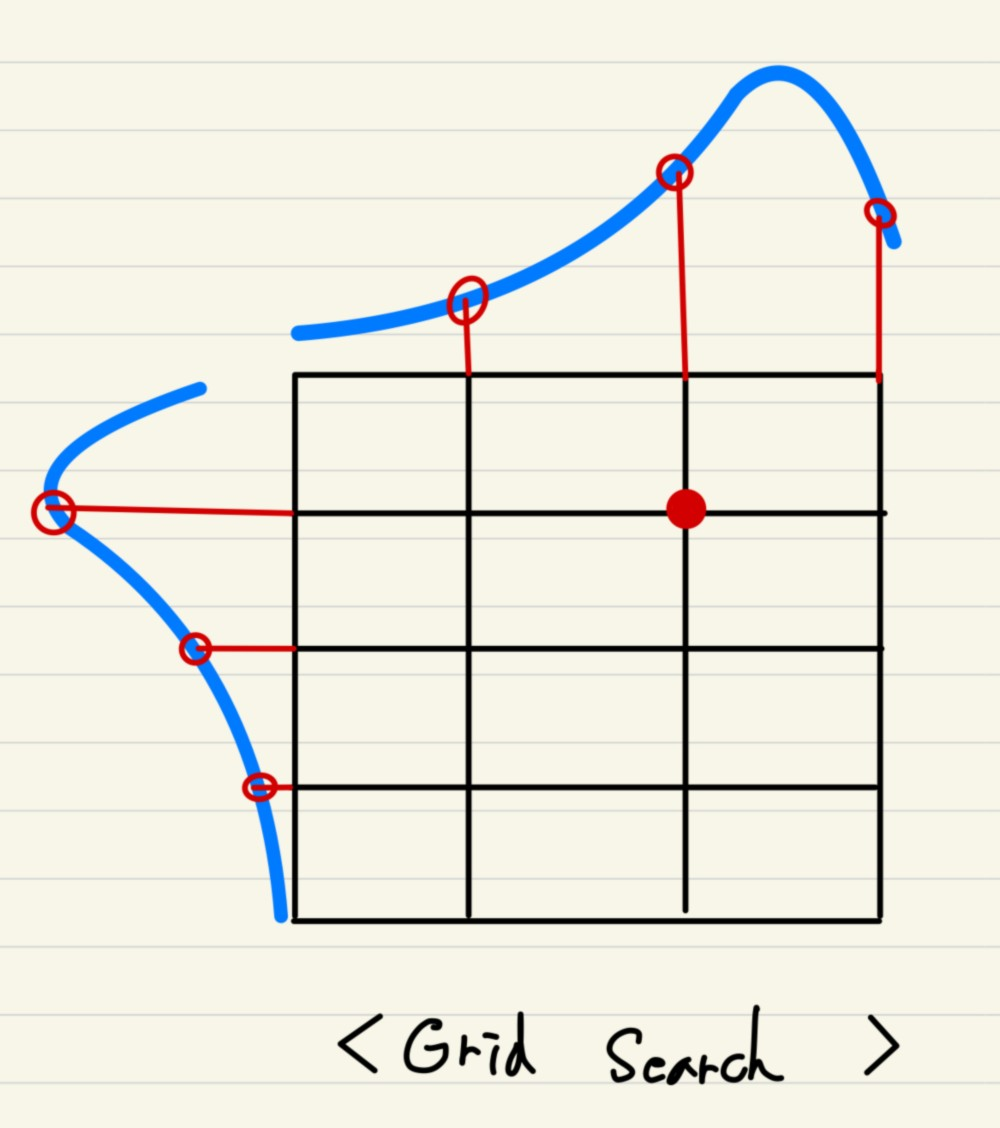   
- 기법 : Grid Search는 사전에 탐색할 값을을 미리 지정해주고, 그 값들의 모든 조합을 바탕으로 성능 최고점을 찾는다.
- 장점
    - 내가 원하는 범위를 정확하게 비교 분석이 가능
- 단점
    - 시간이 오래걸린다.
    - 성능의 최고점이 아닐 가능성이 놓다.
    - 최적화 검색, **최적화 탐색이 아니다.** 
     > 최적화 검색 : 여러개들을 비교 분석해서 최고를 찾아내는 기법   
     > 최적화 탐색 : 성능이 가장 높은 점으로 점차 찾아가는 기법 
   
2. Random Search   
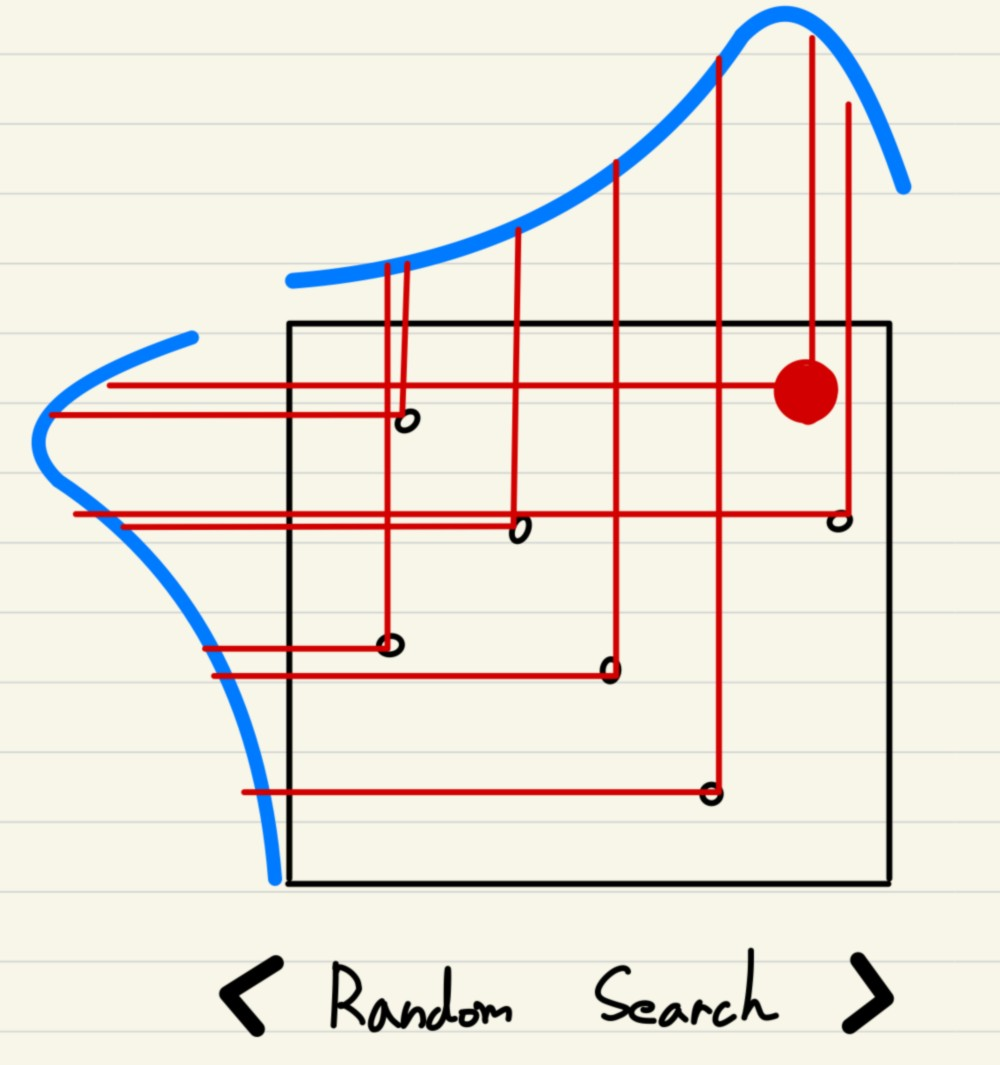   
- 기법 : 사전에 탐색할 값들의 범위를 지정해주고, 그 범위 속에서 가능한 조합을 바탕으로 최고점을 찾아낸다.
- 장점 
    - Grid Search에 비해 시간이 짧게 걸린다.
    - Grid Search보다 랜덤하게 점을 찍기 때문에, 성능이 더 좋을 가능성이 있다.
- 단점 
    - 성능이 Grid Search보다 낮을 가능성도 있다. (Random)
    - 하이퍼 파라미터의 범위가 너무 넣ㅂ으면, 일반화된 결과가 나오지 않는다. (할 때 마다 달라질 수 있음)
    - seed를 고정하지 않으면, 할 때 마다 결과가 달라진다.
    - 최적값 검색, **최적화 탐색** 의 개념이 아니다.

3. Bayeisan Optimization   
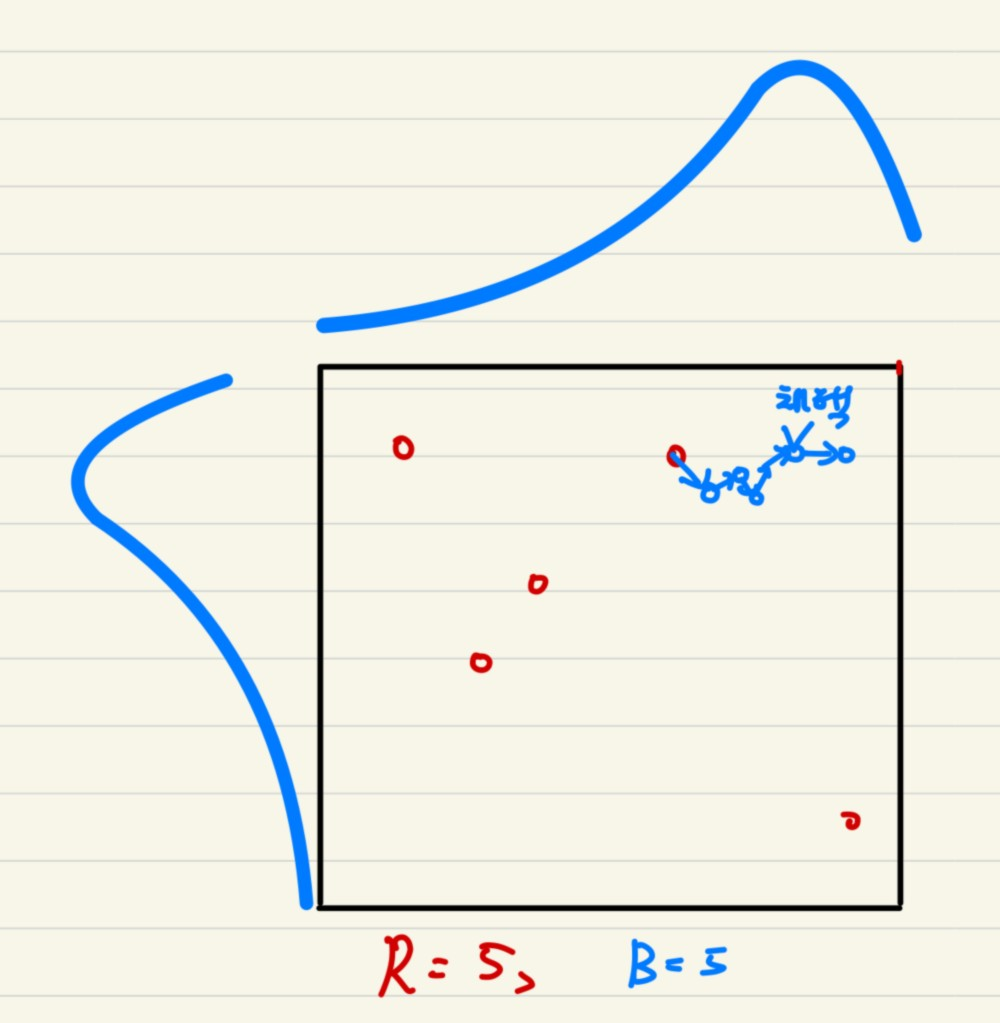   
- 기법 : 하이퍼파라미터의 범위를 지정한 후, Random하게 R번 탐색한 후, B번 만큼 최적의 값을 찾아간다.
- 장점
    - 정말 "최적의 값"을 찾아갈 수 있다.
    - 상대적으로 시간이 덜 걸린다.
    - 엔지니어가 그 결과값을 신뢰할 수 있다.
- 단점
    - Random하게 찍은 값이 달라질 경우, 최적화 하는데 오래 걸릴 수 있다.
    - Random하게 찍은 값이 부족하면, 최적의 값을 탐색하는게 불가능 할 수 있다.
    - Random하게 찍은 값이 너무 많으면, 최적화 이전에 이미 최적값을 가지고 있을 수도 있다.   
    =>그럼에도, Bayesian Optimization은 수동적으로 하이퍼 파라미터를 튜닝하는데 좋은 결과를 가져온다.


In [34]:
import pandas as pd
import numpy as np

from sklearn.model_selection import KFold, train_test_split
from bayes_opt import BayesianOptimization 


#학습데이터 organization
X = train.drop(columns=['index', 'quality'])
y = train['quality']

#랜덤포레스트의 하이퍼파라미터 범위 지정 > dictionary 형태
# dict	{'a':1, 'b':2, 'c':3}	순서없는 (키,값) 매핑
rf_parameter_bounds = {
    'max_depth' : (1,3),
    'n_estimators' : (30,100),
}

#함수 생성
def rf_bo(max_depth, n_estimators):
    rf_params = {
        'max_depth' : int(round(max_depth)),
        'n_estimators' : int(round(n_estimators)),
    }
    
    rf = RandomForestClassifier(**rf_params)
    
    #train_test_split  > train, valid 데이터 나누기
    X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size = 0.2,)
    
    rf.fit(X_train, y_train)
    
    #성능 분석
    score = accuracy_score(y_valid, rf.predict(X_valid))
    return score

#튜닝 모델 저장
BO_rf = BayesianOptimization(f = rf_bo, pbounds = rf_parameter_bounds, random_state = 0)

#튜닝 실행
BO_rf.maximize(init_points = 5, n_iter =5)

#결과값 저장
max_params = BO_rf.max['params']
max_params['max_depth'] =int(max_params['max_depth'])
max_params['n_estimators'] =int(max_params['n_estimators'])
print(max_params)

BO_tuend_rf = RandomForestClassifier(**max_params)


|   iter    |  target   | max_depth | n_esti... |
-------------------------------------------------
|  1        |  0.5164   |  2.098    |  80.06    |
|  2        |  0.5345   |  2.206    |  68.14    |
|  3        |  0.5336   |  1.847    |  75.21    |
|  4        |  0.5282   |  1.875    |  92.42    |
|  5        |  0.5236   |  2.927    |  56.84    |
|  6        |  0.4782   |  1.018    |  48.01    |
|  7        |  0.4518   |  1.217    |  66.52    |
|  8        |  0.5009   |  2.247    |  68.19    |
|  9        |  0.52     |  2.199    |  49.04    |
|  10       |  0.53     |  2.089    |  87.6     |
{'max_depth': 2, 'n_estimators': 68}


> **operation in dict   
> ![**](https://ifh.cc/g/OthOX4.png)

---
출처
- https://leebaro.tistory.com/entry/%EB%B0%95%EC%8A%A4-%ED%94%8C%EB%A1%AFbox-plot-%EC%84%A4%EB%AA%85
- https://bigdaheta.tistory.com/41
- https://wikidocs.net/155466
- https://stackoverflow.com/questions/2255878/what-does-mean-in-the-expression-dictd1-d2